In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Texas House Price Data.csv')

In [ ]:
# Load the new dataset and inspect the first few rows to understand its structure

import pandas as pd

# Path to the uploaded file

# Load the dataset
data_texas = pd.read_csv('Texas House Price Data.csv')

# Display the first few rows of the dataset
data_texas.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024
0,9,0,California,state,NaN,192470.060335,193117.009656,193990.549660,195886.744543,198090.785451,...,760025.643822,766336.724042,770852.982715,773728.370200,774273.309545,774116.644365,775636.207722,779594.216542,784195.835143,786730.276988
1,54,1,Texas,state,NaN,113226.801439,113288.331807,113318.175000,113466.289412,113562.210628,...,307551.282143,307315.284600,306814.436216,306195.784974,305992.482068,306258.438358,307147.339059,308019.592897,308356.980100,308121.158599
2,14,2,Florida,state,NaN,107306.038895,107538.473764,107820.231157,108392.971467,109010.610173,...,392918.951496,393985.127566,394919.934792,395754.227659,396461.854007,397191.585312,398058.169878,398740.305800,398865.191001,398076.903152
3,43,3,New York,state,NaN,154844.923450,155396.323483,155927.134937,157068.766074,158249.946200,...,456703.550090,458597.486032,460179.119658,461911.116311,463746.784413,466013.773927,469063.607818,472791.569372,476218.118558,478973.354185
4,47,4,Pennsylvania,state,NaN,100629.177650,100844.415840,101046.681922,101458.869462,101882.289273,...,263668.020289,264588.144590,265141.010033,265594.055411,266115.237904,266968.513152,268327.586206,270041.807157,271568.390887,272477.133562


In [ ]:
# Filter the data for Texas
texas_data = data_texas[data_texas['RegionName'] == 'Texas']

In [ ]:
# Drop unnecessary columns and transpose the data
texas_data = texas_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']).T
texas_data.columns = ['HousePrice']

In [ ]:
texas_data.head()

,HousePrice
1/31/2000,113226.801439
2/29/2000,113288.331807
3/31/2000,113318.175000
4/30/2000,113466.289412
5/31/2000,113562.210628


In [ ]:
# Convert the index to datetime format
texas_data.index = pd.to_datetime(texas_data.index)

In [ ]:
# Split the data into training and test sets
train_data, test_data = texas_data[:'2023-01-01'], texas_data['2023-01-01':]

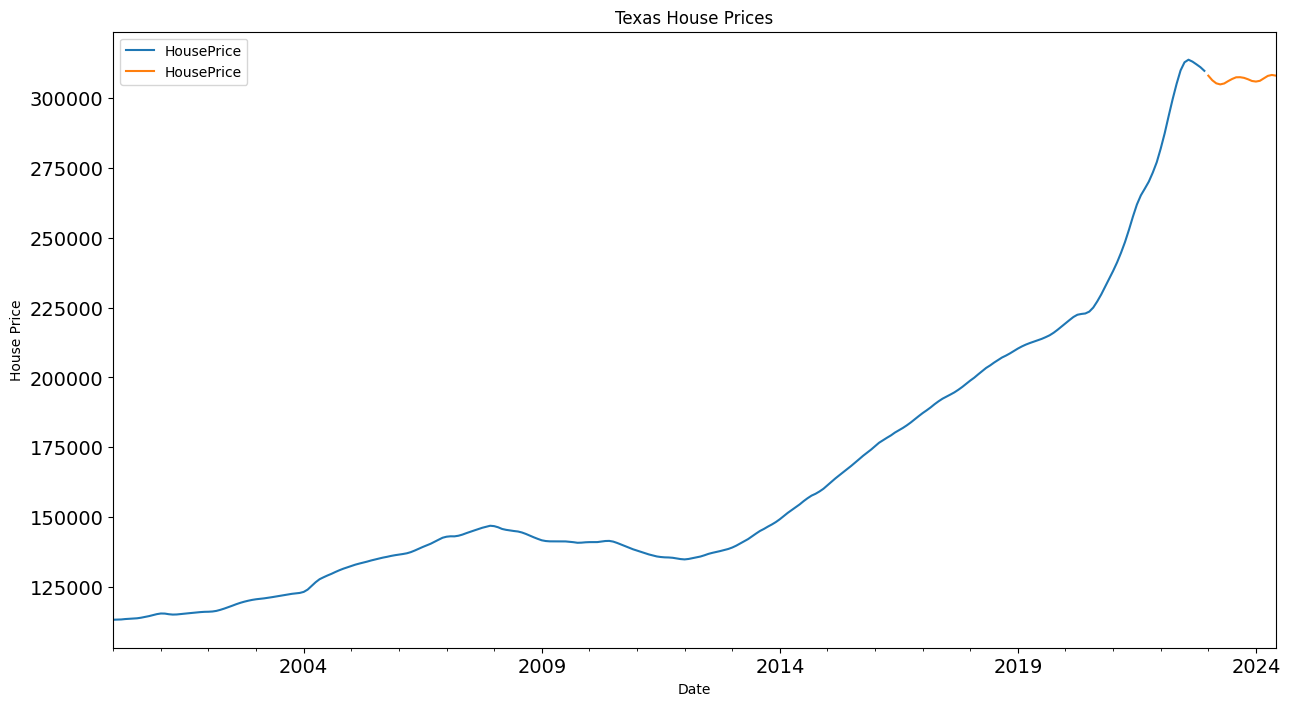

In [ ]:
import matplotlib.pyplot as plt
#Plotting data
train_data.HousePrice.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test_data.HousePrice.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.xlabel('Date')
plt.ylabel('House Price')
plt.title('Texas House Prices')
plt.legend()
plt.show()

Non stationary data
Blue part is the Train data, Orange is the Test data

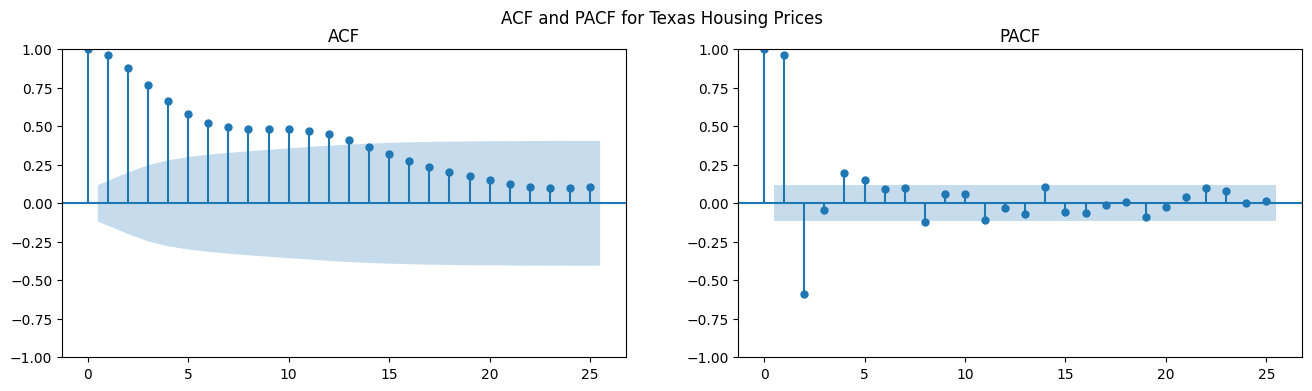

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotting the ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('ACF and PACF for Texas Housing Prices')

# ACF
sm.graphics.tsa.plot_acf(train_data['HousePrice'].diff().dropna(), ax=axes[0])
axes[0].set_title('ACF')

# PACF
sm.graphics.tsa.plot_pacf(train_data['HousePrice'].diff().dropna(), ax=axes[1])
axes[1].set_title('PACF')

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


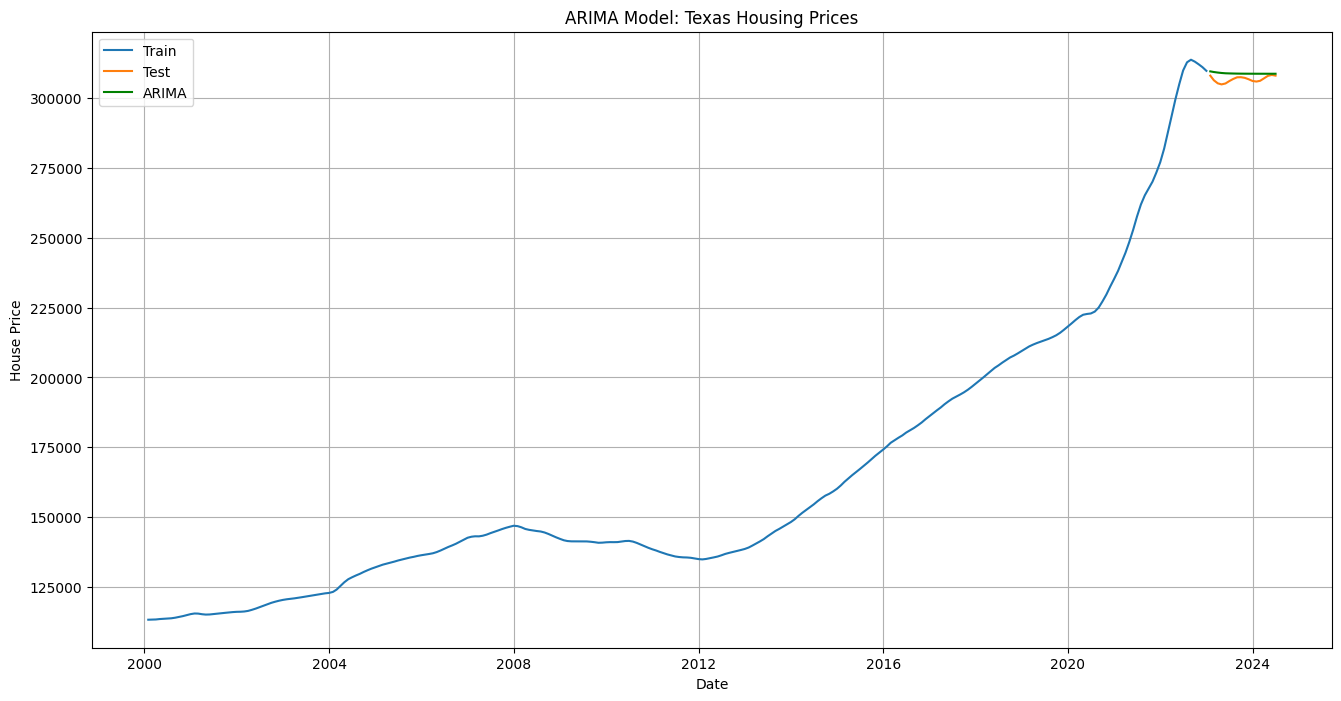

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_data['HousePrice'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
y_hat_avg = test_data.copy()
y_hat_avg['ARIMA'] = model_fit.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(train_data['HousePrice'], label='Train')
plt.plot(test_data['HousePrice'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA', color='green')
plt.legend(loc='best')
plt.title('ARIMA Model: Texas Housing Prices')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.grid(True)
plt.show()

In [ ]:
# Calculate RMSE
rms = sqrt(mean_squared_error(test_data['HousePrice'], y_hat_avg['ARIMA']))
rms

2379.4436040063697